<a href="https://colab.research.google.com/github/rafaelpuyau/PUC-Rio/blob/main/MVP_Sprint_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of Data Brazil 2022

**Objetivo**: entender e descrever claramente o problema que está sendo resolvido. 

* Qual é a descrição do problema?
* Este é um problema de aprendizado supervisionado ou não supervisionado?
* Que premissas ou hipóteses você tem sobre o problema?
* Que restrições ou condições foram impostas para selecionar os dados?
* Defina cada um dos atributos do dataset. 

## Qual é a descrição do problema?

Entender o cenário de dados no Brasil com uma visão holística e direcionada, apesar de ser uma área relativamente nova em nosso país. Este estudo jogar uma luz neste seguimento e ajudará a entender o perfil dos profissionais que estão atuando na área de dados. 

## Este é um problema de aprendizado supervisionado ou não supervisionado?

Dependerá do viés que desejamos abordar o problema. Podemos olhar para o _aprendizado supervisionado_ se quisermos verificar se o respondente está satisfeito e se a empresa na qual trabalha, possui um **Data Lake** e verificando o cargo em que atual no momento. 

Porém, também, podemos olhar para o _aprendizado não supervisionado_ para encontrar grupos semelhantes, um caso de aglomeração.

Neste primeiro estudo, olharei para o _aprendizado supervisionado_.

## Que premissas ou hipóteses você tem sobre o problema?

Sabemos que para empresas _Data-Driven_ é extremamente importante que possuam uma infra-estrutura minimamente adequada para implementação de pipelines de dados. Com isto, quero dizer, que o **Data Lake** é de suma importância para estas empresas, pois seus sistemas transacionais poderão "depositar" seus arquivos de output, em diversos formatos, num repositório centralizado. 

Para **Engenheiros de Dados** e **Cientista de Dados** que se beneficiam de uma arquitetura que contém um _Data Lake_, torna o trabalho destes profissionais mais facilitado para acessar e extrair os dados de que precisam tendo um ponto focal. Assim, acredito que estes profissionais estejam mais satisfeitos em suas empresas do que profissionais em empresas que não possuem um _Data Lake_.

## Que restrições ou condições foram impostas para selecionar os dados?

Analisaremos apenas os profissionais residentes no Brasil e não analisaremos nenhuma linguagem específica para a parte de dados bem como nenhuma cloud em especial.

Desejamos buscar apenas um percentual dos que estão satisfeitos em suas empresas possuindo ou não um _Data Lake_.

## Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Configurações de exibição

In [3]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

## Funções relevantes para o tratamento do dataframe

In [37]:
def fix_col_name(cols: list) -> list:
  '''
  Corrije o nome das colunas eliminando caracteres indesejados, bem como
  espaços, parêntesis etc...

  Params:
    cols - recebe a lista de colunas do dataframe

  Return:
    Retorna uma lista com os nomes tratados
  '''
  col_list_tmp = []
  for col in cols:
    col_tmp_name = col[col.index(',')+3:-2]
    col_list_tmp.append(col_tmp_name)
  return col_list_tmp

## Carregando o Dataset

In [38]:
dataset = r'/content/drive/MyDrive/Colab Notebooks/PUC-Rio/datasets/State_of_data_2022.csv'
df = pd.read_csv(dataset, engine='pyarrow')

In [39]:
# Verificando as 5 primeiras linhas do dataframe
df.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')","('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_j ', 'Mudou de Estado?')","('P1_k ', 'Regiao de origem')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_2 ', 'Salário atual não corresponde ao mercado')","('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_5 ', 'Gostaria de receber mais benefícios')","('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')","('P2_l_7 ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_1 ', 'Remuneração/Salário')","('P2_o_2 ', 'Benefícios')","('P2_o_3 ', 'Propósito do trabalho e da empresa')","('P2_o_4 ', 'Flexibilidade de trabalho remoto')","('P2_o_5 ', 'Ambiente e clima de trabalho')","('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_9 ', 'Qualidade dos gestores e líderes')","('P2_o_10 ', 'Reputação que a empresa tem no mercado')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')","('P2_q ', 'Qual a forma de trabalho ideal para você?')","('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_1 ', 'Analytics Engineer')","('P3_b_2 ', 'Engenharia de Dados/Data Engineer')","('P3_b_3 ', 'Analista de Dados/Data Analyst')","('P3_b_4 ', 'Cientista de Dados/Data Scientist')","('P3_b_5 ', 'Database Administrator/DBA')","('P3_b_6 ', 'Analista de Business Intelligence/BI')","('P3_b_7 ', 'Arquiteto de Dados/Data Architect')","('P3_b_8 ', 'Data Product Manager/DPM')","('P3_b_9 ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as

In [40]:
# Atualiza as colunas no dataframe, pois seus nomes estão "poluídos"
df.columns = fix_col_name(df.columns.to_list())
df.columns

Index(['id', 'Idade', 'Faixa idade', 'Genero', 'Cor/raca/etnia', 'PCD',
       'experiencia_profissional_prejudicada', 'aspectos_prejudicados',
       'vive_no_brasil', 'Estado onde mora',
       ...
       'Coletando e limpando os dados que uso para análise e modelagem.',
       'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
       'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
       'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.',
       'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
       'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.',
       'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.'

In [41]:
# Verificando novamente as primeiras linhas do dataframe
df.head()

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Mudou de Estado?,Regiao de origem,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,Numero de Funcionarios,Gestor?,Cargo como Gestor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Remuneração/Salário,Benefícios,Propósito do trabalho e da empresa,Flexibilidade de trabalho remoto,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,Analytics Engineer,Engenharia de Dados/Data Engineer,Analista de Dados/Data Analyst,Cientista de Dados/Data Scientist,Database Administrator/DBA,Analista de Business Intelligence/BI,Arquiteto de Dados/Data Architect,Data Product Manager/DPM,Business Analyst,Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,"Atração, seleção e contratação de talentos para o time de dados.",Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,"Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.","Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.",Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,"Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.","Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.","Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.","Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira",Quais são os 3 maiores desafios que você tem como gestor no atual momento?,a Contratar novos talentos.,b Reter talentos.,c Convencer a empresa a aumentar os investimentos na área de dados.,d Gestão de equipes no ambiente remoto.,e Gestão de projetos envolvendo áreas multidisciplinares da empresa.,f Organizar as informações e garantir a qualidade e confiabilidade.,g Conseguir processar e armazenar um alto volume de dados.,h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.,i Desenvolver e manter modelos Machine Learning em produção.,j Gerenciar a exp

In [43]:
# Pegando um exemplo "variado" das observações
df.sample(10)

,id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,experiencia_profissional_prejudicada,aspectos_prejudicados,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Mudou de Estado?,Regiao de origem,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,Numero de Funcionarios,Gestor?,Cargo como Gestor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Remuneração/Salário,Benefícios,Propósito do trabalho e da empresa,Flexibilidade de trabalho remoto,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,Analytics Engineer,Engenharia de Dados/Data Engineer,Analista de Dados/Data Analyst,Cientista de Dados/Data Scientist,Database Administrator/DBA,Analista de Business Intelligence/BI,Arquiteto de Dados/Data Architect,Data Product Manager/DPM,Business Analyst,Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,"Atração, seleção e contratação de talentos para o time de dados.",Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,"Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.","Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.",Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,"Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.","Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.","Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.","Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira",Quais são os 3 maiores desafios que você tem como gestor no atual momento?,a Contratar novos talentos.,b Reter talentos.,c Convencer a empresa a aumentar os investimentos na área de dados.,d Gestão de equipes no ambiente remoto.,e Gestão de projetos envolvendo áreas multidisciplinares da empresa.,f Organizar as informações e garantir a qualidade e confiabilidade.,g Conseguir processar e armazenar um alto volume de dados.,h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.,i Desenvolver e manter modelos Machine Learning em produção.,j Gerenciar a exp

## Conhecendo um pouco mais a base de dados

In [44]:
# Verificando a forma do dataframe
print(f'Linhas: {df.shape[0]:>5}\nColunas: {df.shape[1]:>4}')

Linhas:  4271
Colunas:  353


In [45]:
# Verificando os tipos de dados de cada coluna
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 353 columns):
 #    Column                                                                                                                                                                                                 Dtype  
---   ------                                                                                                                                                                                                 -----  
 0    id                                                                                                                                                                                                     object 
 1    Idade                                                                                                                                                                                                  float64
 2    Faixa idade                       

In [46]:
# Verificando valores nulos no dataframe original
df.isna().sum()

id                                                                                                               0
Idade                                                                                                           74
Faixa idade                                                                                                      0
Genero                                                                                                           0
Cor/raca/etnia                                                                                                   0
                                                                                                              ... 
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.           3642
Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.            3642
Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.    

Com o comando acima, percebe-se que há colunas com muitos valores nulos. Entendo que aqui faz-se necessário realizarmos um corte e deixar apenas as colunas que ajudarão nesta primeira análise.

Desta forma, criaremos uma lista apenas com as colunas que desejamos manter em nosso dataframe.

In [47]:
# Colunas relacionadas para este recorte
novas_colunas = [
    'Idade', 
    'Faixa idade', 
    'Genero', 
    'Cor/raca/etnia', 
    'vive_no_brasil', 
    'Estado onde mora',
    'uf onde mora',
    'Regiao onde mora',
    'Nivel de Ensino',
    'Qual sua situação atual de trabalho?',
    'Setor',
    'Cargo Atual',
    'Nivel',
    'Faixa salarial',
    'Quanto tempo de experiência na área de dados você tem?',
    'Você está satisfeito na sua empresa atual?',
    'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
    'Remuneração/Salário',
    'Atualmente qual a sua forma de trabalho?',
    'Qual a forma de trabalho ideal para você?',
    'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
    'Atuacao',
    'Sua organização possui um Data Lake?',
    ]

# Crio um novo dataframe com base nas colunas selecionadas
df_filtrado = df[novas_colunas].copy()

# Uma vez filtrado com as colunas que desejamos, filtraremos apenas os respondentes que residem no Brasil
# Esta será a nossa população
df_filtrado = df_filtrado[df_filtrado['vive_no_brasil'] == True].copy()

In [48]:
# Pegando novamente o novo formato do dataframe
print(f'Linhas: {df_filtrado.shape[0]:>5}\nColunas: {df_filtrado.shape[1]:>4}')

Linhas:  4171
Colunas:   23


In [49]:
# Verifico novamente o dataframe com base na novas colunas
df_filtrado.head()

,Idade,Faixa idade,Genero,Cor/raca/etnia,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Nivel de Ensino,Qual sua situação atual de trabalho?,Setor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Você está satisfeito na sua empresa atual?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Remuneração/Salário,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Atuacao,Sua organização possui um Data Lake?
0,39.0,35-39,Masculino,Parda,True,Distrito Federal (DF),DF,Centro-oeste,Pós-graduação,Servidor Público,Setor Público,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,True,Benefícios,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Engenharia de Dados,False
1,32.0,30-34,Masculino,Parda,True,Pará (PA),PA,Norte,Graduação/Bacharelado,Empregado (CLT),Outra Opção,,,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,False,"Remuneração/Salário, Plano de carreira e oport...",1.0,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Gestor,None
2,53.0,50-54,Masculino,Branca,True,Distrito Federal (DF),DF,Centro-oeste,Pós-graduação,Empregado (CLT),Finanças ou Bancos,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,False,"Remuneração/Salário, Flexibilidade de trabalho...",1.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Ciência de Dados,None
3,27.0,25-29,Masculino,Branca,True,Minas Gerais (MG),MG,Sudeste,Doutorado ou Phd,Empregado (CLT),Setor Automotivo,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,True,"Remuneração/Salário, Flexibilidade de trabalho...",1.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Ciência de Dados,None
4,46.0,45-49,Feminino,Branca,True,Pará (PA),PA,Norte,Pós-graduação,Servidor Público,Setor Público,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,False,"Remuneração/Salário, Oportunidade de aprendiza...",1.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Outra atuação,None


## Trabalhando com o novo dataframe (_df_filtrado_)

Agora que selecionamos as colunas relevantes para esta análise exploratória e, também, selecionamos todas as observações dos respondentes que residem no Brasil, podemos trabalhar neste dataframe.

Inicialmente pegaremos a forma com o atributo `shape` e depois coletaremos informações com os métodos `info()` e `describe()`.

In [50]:
# Coletando novamente as informações com o método info()
df_filtrado.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 0 to 4270
Data columns (total 23 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Idade                                                                                              4098 non-null   float64
 1   Faixa idade                                                                                        4171 non-null   object 
 2   Genero                                                                                             4171 non-null   object 
 3   Cor/raca/etnia                                                                                     4171 non-null   object 
 4   vive_no_brasil                                                                                     4171 non-null   bool 

In [51]:
# Olhando para os dados estatísticos deste dataframe
df_filtrado.describe()

,Idade,Remuneração/Salário
count,4098.000000,3618.000000
mean,31.125427,0.749862
std,6.924178,0.433152
min,18.000000,0.000000
25%,26.000000,0.250000
50%,30.000000,1.000000
75%,35.000000,1.000000
max,54.000000,1.000000


In [18]:
# Descrever os insgihts desta primeira análise

Repare que o método `describe()` relaciona apenas as colunas numéricas, mas acho interessante relacionar todas as colunas. Para isso, passamos o parâmetro `include=all`.

O que chama a atenção nesta saída do método `describe()` são os valores da coluna _Remuneração/Salário_. Repare:

* nos valores máximo e mínimo
* nos quartis 

In [56]:
# Pegando os valores únicos 
print(f"Listando os valores únicos da coluna Remuneração/Salário: {df_filtrado['Remuneração/Salário'].unique()}")
print(f"Quantidade de valores únicos da coluna Remuneração/Salário: {df_filtrado['Remuneração/Salário'].nunique()}")

Listando os valores únicos da coluna Remuneração/Salário: [ 0.  1. nan]
Quantidade de valores únicos da coluna Remuneração/Salário: 2


In [21]:
# Verificando a quantidade de valores nulos e o percentual de cada valor nesta Series
print(f"Quantidade de observações nulas: {df_filtrado['Remuneração/Salário'].isna().sum()}\n")
df_filtrado['Remuneração/Salário'].value_counts(normalize=True, dropna=False).mul(100).round(2).astype(str) + '%'

Quantidade de observações nulas: 577



1.0    64.93%
0.0    21.56%
NaN    13.51%
Name: Remuneração/Salário, dtype: object

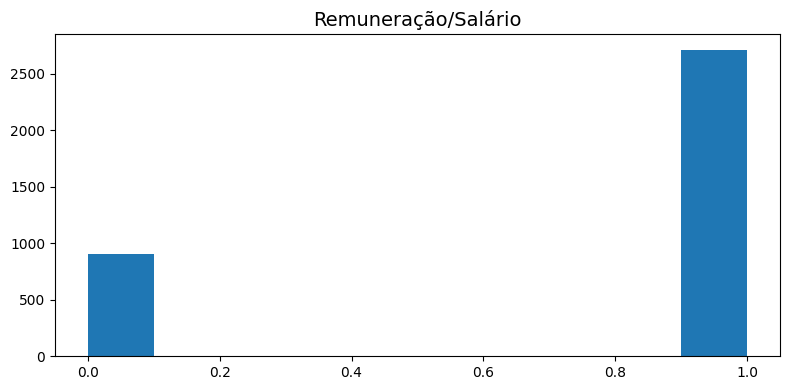

In [58]:
# Histograma para ver graficamente a distribuição de Remuneração/Salário

fig, ax = plt.subplots(figsize=(8,4))

ax.hist(df_filtrado['Remuneração/Salário'], bins=10)
ax.set_title('Remuneração/Salário', fontsize=14)

plt.tight_layout()
plt.show()

A distribuição dos dados no histograma de _Remuneração/Salário_ está muito espaçada. Desta forma, não há como seguir com esta coluna no dataframe.

Com estas informações coletadas e o gráfico apresentado, temos a explicação para os dados coletados pelo método `describe()`. A coluna Remuneração/Salário contém valores nulos além de zeros e uns. 

Assim, não poderemos utilizá-la para verificar a média salarial por região, estado, cargo e nem ver o maior e menor salário por cargo.

In [59]:
# Removendo a coluna Remuneração/Salário
df_filtrado.drop(columns=['Remuneração/Salário'], inplace=True)

In [60]:
df_filtrado.describe(include='all')

,Idade,Faixa idade,Genero,Cor/raca/etnia,vive_no_brasil,Estado onde mora,uf onde mora,Regiao onde mora,Nivel de Ensino,Qual sua situação atual de trabalho?,Setor,Cargo Atual,Nivel,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Você está satisfeito na sua empresa atual?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Atuacao,Sua organização possui um Data Lake?
count,4098.000000,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,3618,4171,4171,4171,4171,4171,654
unique,NaN,9,4,7,1,23,23,5,7,12,22,19,4,14,8,2,460,5,5,4,6,2
top,NaN,25-29,Masculino,Branca,True,São Paulo (SP),SP,Sudeste,Graduação/Bacharelado,Empregado (CLT),Tecnologia/Fábrica de Software,,,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,True,,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Análise de Dados,True
freq,NaN,1378,3125,2686,4171,1745,1745,2642,1485,2745,695,1252,1252,742,960,2672,553,1650,1897,1590,1303,528
mean,31.125427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.924178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora com esse parâmetro, podemos analisar as colunas categóricas e ver os valores que mais aparecem e com que frequência.

## Algumas análises em forma de gráficos

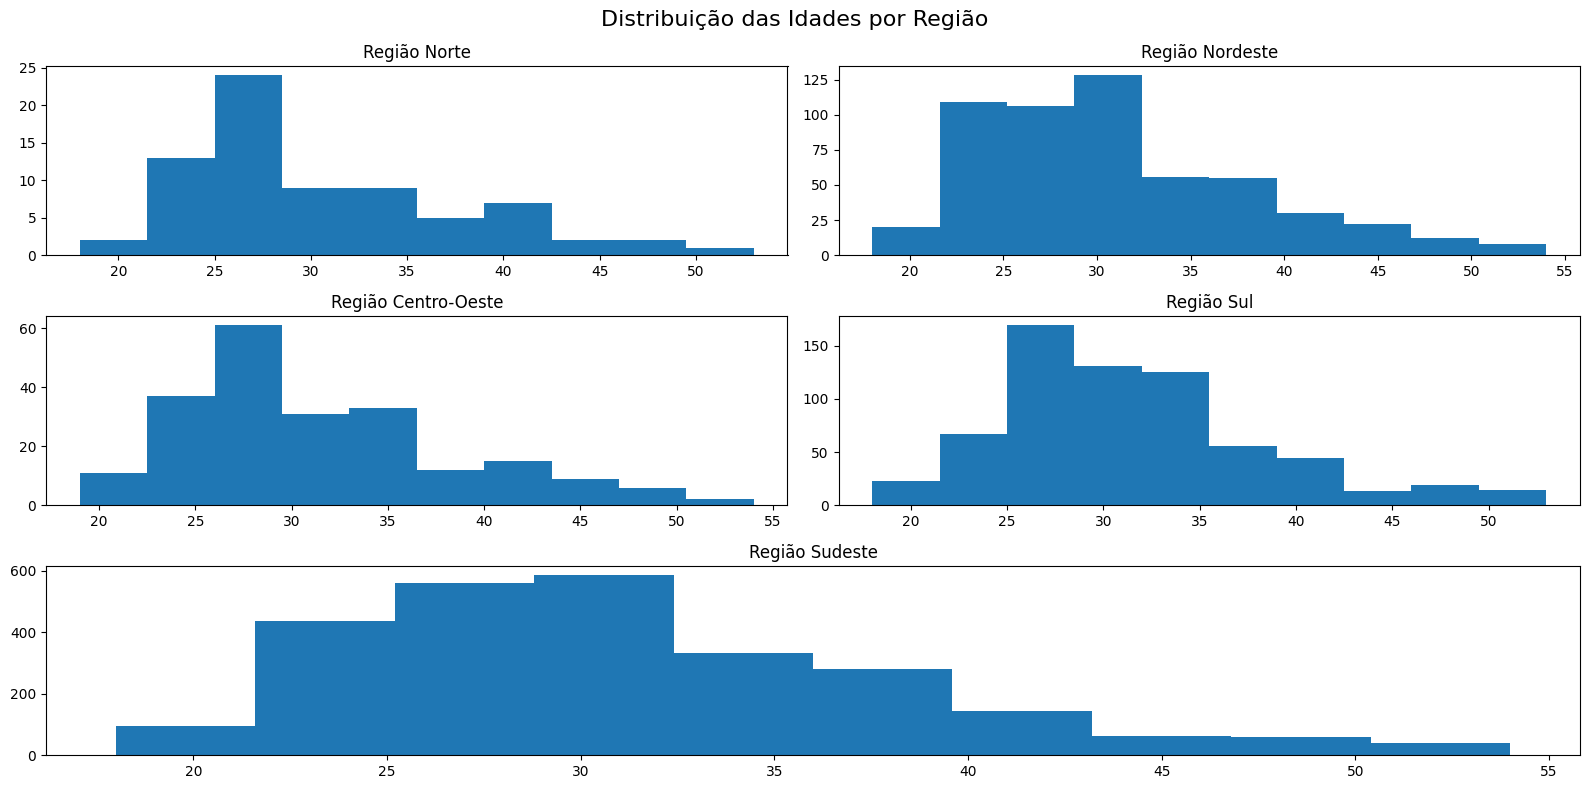

In [79]:
# Distribuição das idades por região
# Agrupamento por região
regiao = df_filtrado.groupby('Regiao onde mora')

plt.figure(figsize=(16,8))
plt.suptitle('Distribuição das Idades por Região', fontsize=16)

ax_norte = plt.subplot2grid((3, 2), (0, 0))
ax_norte.set_title('Região Norte')
ax_norte.hist(regiao.get_group('Norte')['Idade'], bins=10)

ax_nordeste = plt.subplot2grid((3, 2), (0, 1))
ax_nordeste.set_title('Região Nordeste')
ax_nordeste.hist(regiao.get_group('Nordeste')['Idade'], bins=10)

ax_centroeste = plt.subplot2grid((3, 2), (1, 0))
ax_centroeste.set_title('Região Centro-Oeste')
ax_centroeste.hist(regiao.get_group('Centro-oeste')['Idade'], bins=10)

ax_sul = plt.subplot2grid((3, 2), (1, 1))
ax_sul.set_title('Região Sul')
ax_sul.hist(regiao.get_group('Sul')['Idade'], bins=10)

ax_sudeste = plt.subplot2grid((3, 2), (2, 0), colspan=3)
ax_sudeste.set_title('Região Sudeste')
ax_sudeste.hist(regiao.get_group('Sudeste')['Idade'], bins=10)

plt.tight_layout()
plt.show()
# regiao.get_group('Sudeste')['Idade']

No dashboard acima, percebemos que as regiões Sudeste, Sul e Centro-Oeste apresentam maior concentração de respondentes com idades entre os 25 e 35 anos, com destaque, porém para a região sudeste que apresentou o intervalo entre 22 e 38 anos.

Já as regiões Norte e Nordeste apresentaram uma concentração nas faixas etárias menores com 22 à 28 e 22 à 32, respectivamente. 

Vale ressaltar que os histogramas de todas as regiões são assimétricos distorcidos à direita.

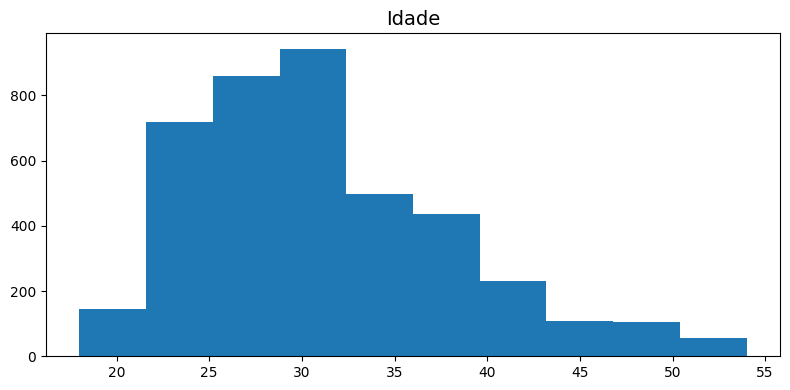

In [57]:
# Análise geral da distribuição das idades
fig, ax = plt.subplots(figsize=(8,4))

ax.hist(df_filtrado['Idade'], bins=10)
ax.set_title('Idade', fontsize=14)

plt.tight_layout()
plt.show()

No histograma acima vemos que há uma concentração grande de respondentes com idades entre 22 à 35 anos. 

É um histograma com assimetria à direita.

In [83]:
# Quantos respondentes por região
regioes = df_filtrado.groupby('Regiao onde mora')['Idade'].count().sort_values(ascending=False)
regioes

Regiao onde mora
Sudeste         2600
Sul              661
Nordeste         546
Centro-oeste     217
Norte             74
Name: Idade, dtype: int64

Com este agrupamento conseguimos ver por região a quantidade de respondentes

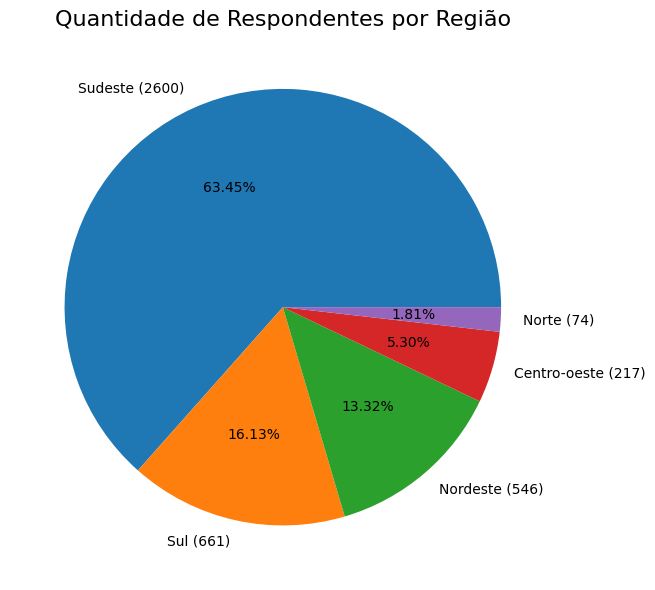

In [100]:
fig, ax = plt.subplots(figsize=(10,6))

labels = [f'{reg} ({qtde})' for reg, qtde in zip(regioes.index, regioes.values)]
# ax.barh(regioes.index, regioes.values, color='mediumslateblue')
# ax.bar_label(ax.containers[0], labels=regioes.values, fontsize=12)
ax.pie(regioes.values, labels=labels, autopct='%1.2f%%')
ax.set_title('Quantidade de Respondentes por Região', fontsize=16)

# ax.invert_yaxis()  # Para mostrar do maior para o menor

# # Removendo alguns spines
# ax.spines[['top', 'right', 'bottom']].set_visible(False)
# # Estilizando o Spine da esquerda
# ax.spines['left'].set_linewidth(1.5)

# # Removendo os ticks do eixo X
# ax.set_xticks([])

# ax.set_yticks(regioes.index)
# ax.set_yticklabels(regioes.index, fontsize=12)

plt.tight_layout()
plt.show()

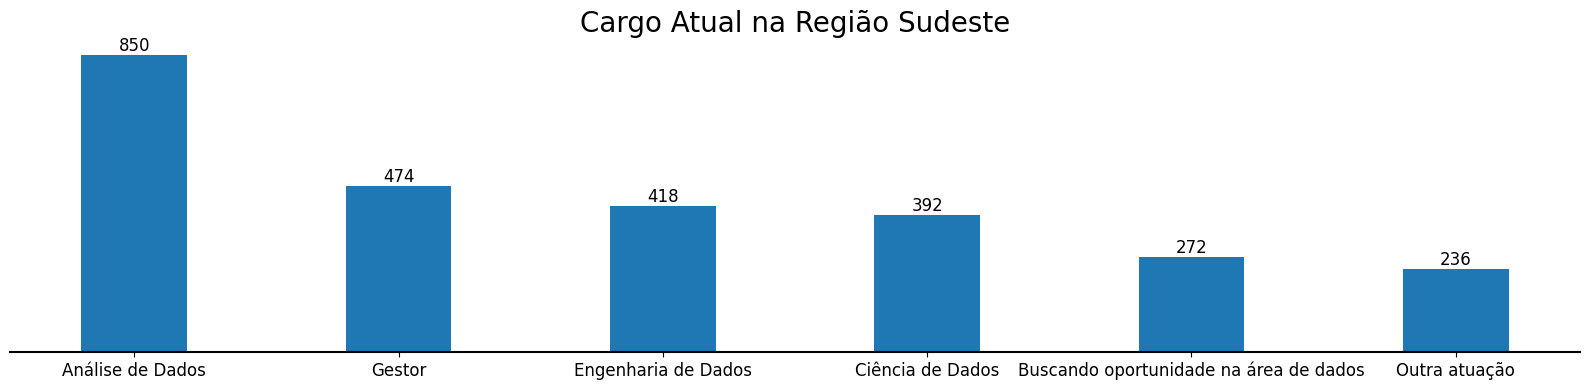

In [117]:
sudeste = regiao.get_group('Sudeste').groupby('Atuacao')['Atuacao'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(sudeste.index, sudeste.values, width=0.4)
ax.bar_label(ax.containers[0], labels=sudeste.values, fontsize=12)

ax.set_title('Cargo Atual na Região Sudeste', fontsize=20)
ax.set_xticks(sudeste.index)
ax.set_xticklabels(sudeste.index, fontsize=12)

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_yticks([])
plt.tight_layout()
plt.show()